# IBM Attrition Analysis and Prediction

# Problem Statement

1. To discover the factors influencing Employee Attrition in given IBM dataset
2. Build effective algorithms for prediction
3. To predict whether employee_attrition = yes/no

# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.defaultaction="ignore"
sns.set(style="whitegrid")

# Loading the Data

In [2]:
data=pd.read_csv("Employee-Attrition.csv")

In [3]:
pd.set_option("display.max_columns",35)#to display all cols

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
data.shape

(1470, 35)

# Check for missing values

In [5]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

# Numerical Analysis-Univariate

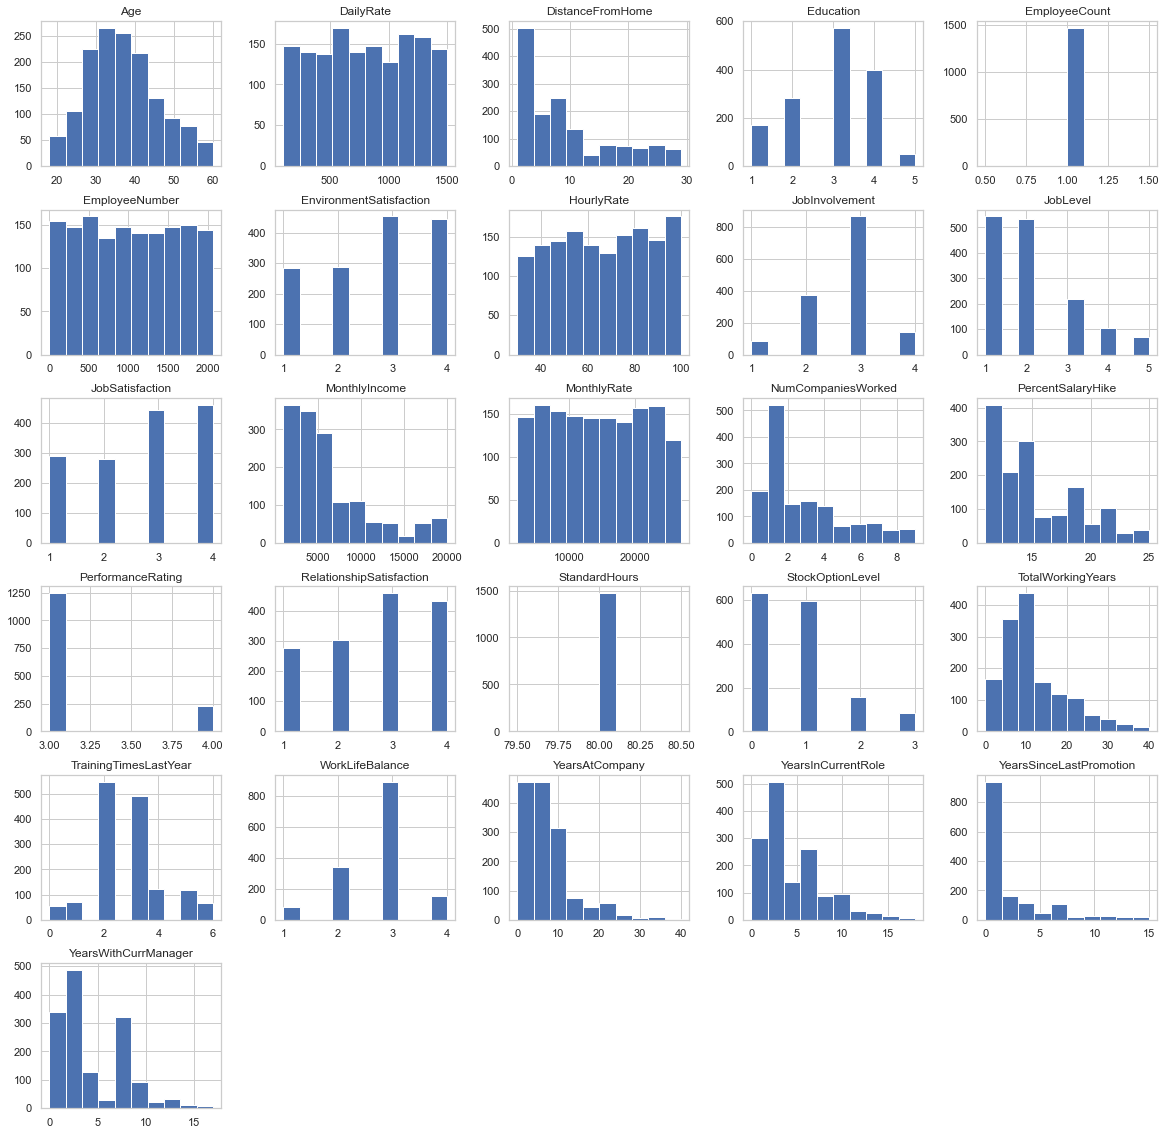

In [6]:
data.hist(figsize=(20,20))
plt.show()

# Understanding
1. Age- Normal Distribution 20 to 60 yrs
2. DailyRate- Uniform Distribution
3. DistanceFromHome- Most of employees stay close to office
4. Employee Number- Unique ID
5. JobInvolvement- Most of the employees have rated 3 i.e highly involved
6. JobSatisfaction/ EnvironmentSatisfaction/ RelationshipSatisfaction - Max employees have rated best 3 or 4, still good no.      aren't satisfied 1 or 2
7. NumCompaniesWorked- Majority working are less than 3 companies old         
8. PercentSalaryHike- Most of them get < 15% hike
9. TrainingTimesLastYear - 2 to 4 times trained in a year
10. WorkLifeBalance- Overall, good!


# Categorical Features

In [8]:
data_categorical=[]

In [9]:
for col in data.columns:
    if data[col].dtype=="object" or data[col].nunique()<8:
        data_categorical.append(col)

In [10]:
data_categorical=data[data_categorical]

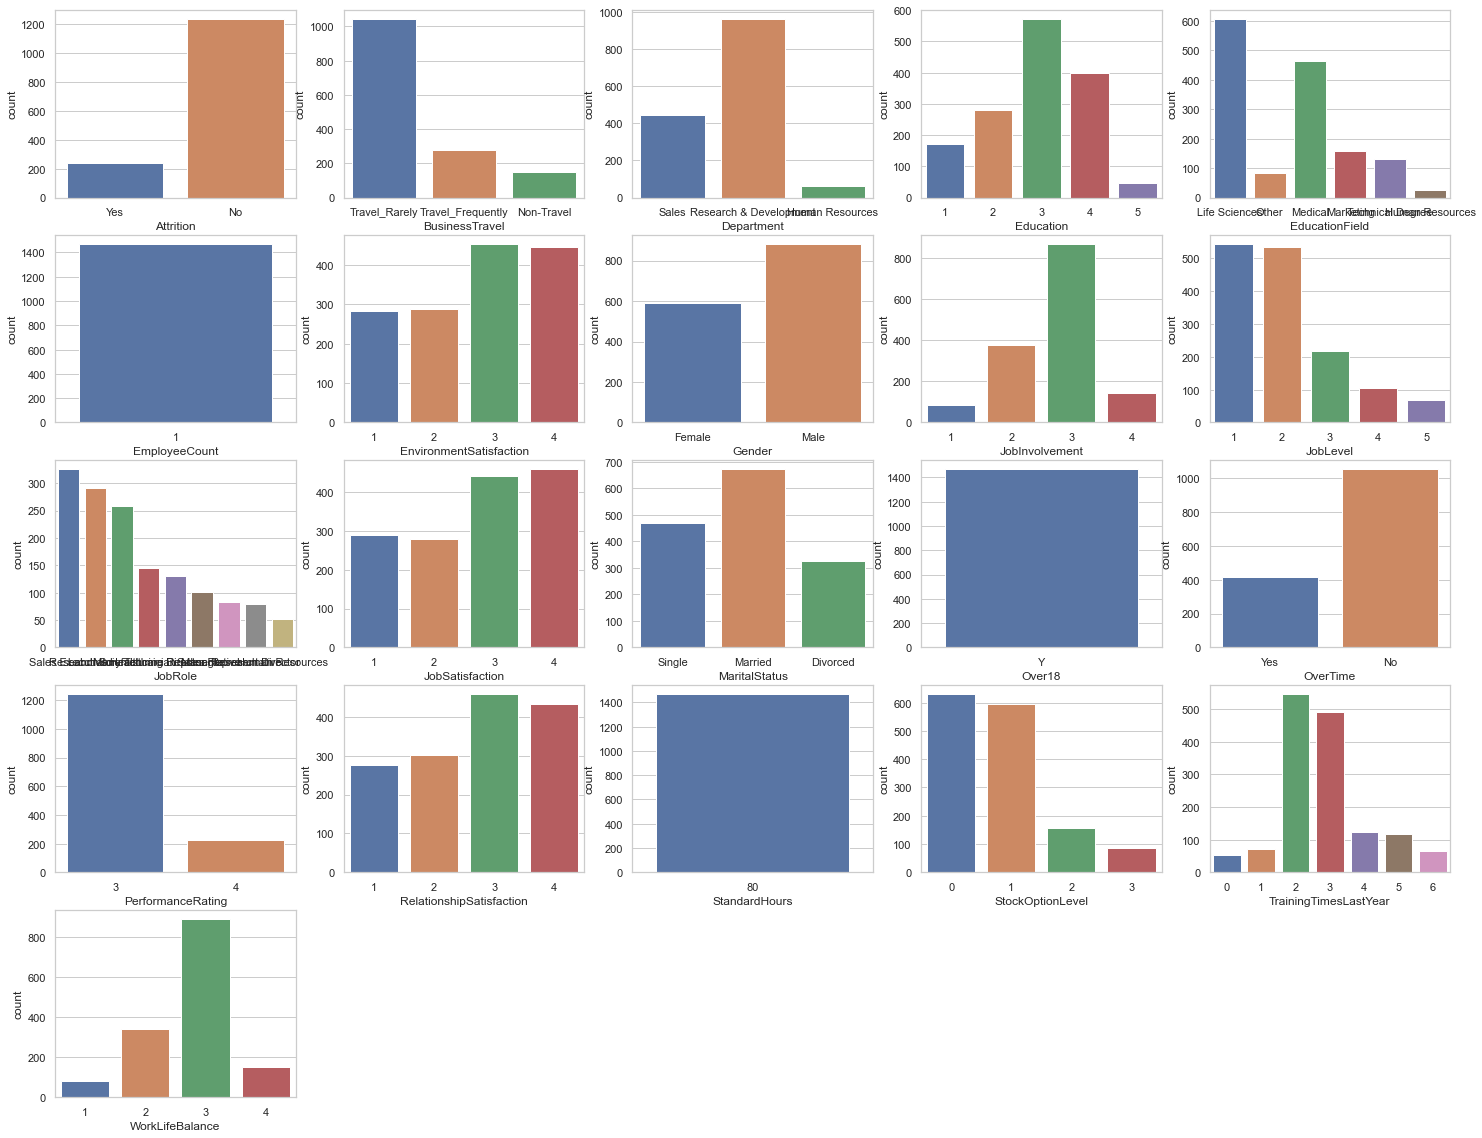

In [11]:
plt.figure(figsize=(25,20))
for i,col in enumerate(data_categorical.columns,1):
    plt.subplot(5,5,i)
    sns.countplot(data_categorical[col])

# Understanding
1. Attrition- 1/7 of employees are leaving
2. BusinessTravel- Travel is there rare/frequent


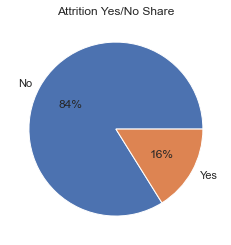

In [12]:
plt.pie(data_categorical['Attrition'].value_counts(),labels=data_categorical['Attrition'].value_counts().index,autopct="%1.f%%")
plt.title("Attrition Yes/No Share")
plt.show()

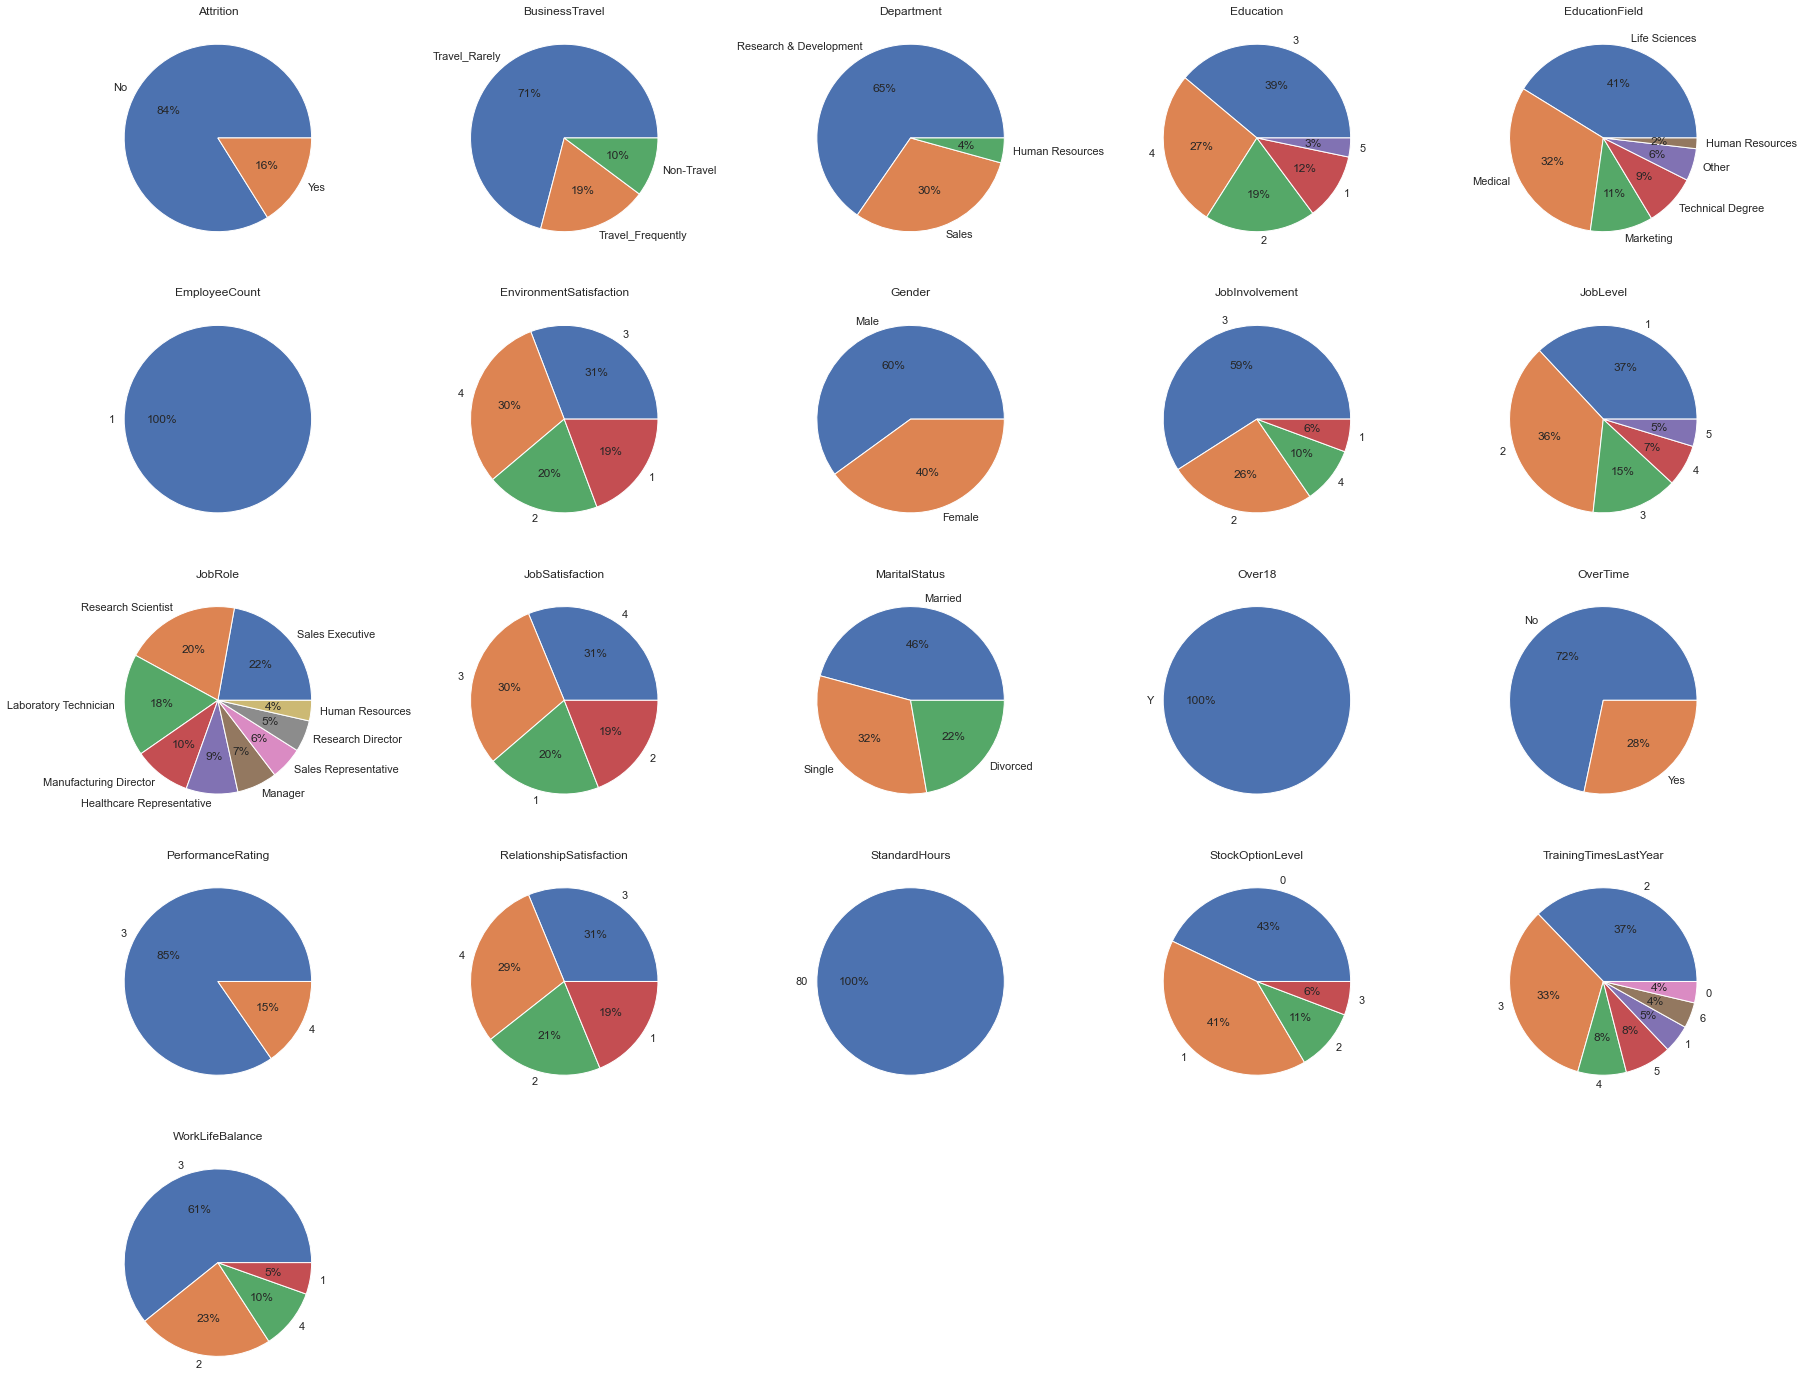

In [13]:
plt.figure(figsize=(30,25))
for i,col in enumerate(data_categorical.columns,1):
    plt.subplot(5,5,i)
    plt.pie(data_categorical[col].value_counts(),labels=data_categorical[col].value_counts().index,autopct="%1.f%%")
    plt.title(col)

# Target Vs Categorical Data

In [14]:
pd.crosstab(data_categorical['EnvironmentSatisfaction'],data_categorical['Attrition'])

Attrition,No,Yes
EnvironmentSatisfaction,,
1,212,72
2,244,43
3,391,62
4,386,60


In [15]:
for col in data_categorical.columns:
    print("****************************************"+col+"***********************************************")
    display(pd.crosstab(data_categorical[col],data_categorical['Attrition']))

****************************************Attrition***********************************************


Attrition,No,Yes
Attrition,,
No,1233,0
Yes,0,237


****************************************BusinessTravel***********************************************


Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


****************************************Department***********************************************


Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


****************************************Education***********************************************


Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


****************************************EducationField***********************************************


Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


****************************************EmployeeCount***********************************************


Attrition,No,Yes
EmployeeCount,,
1,1233,237


****************************************EnvironmentSatisfaction***********************************************


Attrition,No,Yes
EnvironmentSatisfaction,,
1,212,72
2,244,43
3,391,62
4,386,60


****************************************Gender***********************************************


Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


****************************************JobInvolvement***********************************************


Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


****************************************JobLevel***********************************************


Attrition,No,Yes
JobLevel,,
1,400,143
2,482,52
3,186,32
4,101,5
5,64,5


****************************************JobRole***********************************************


Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


****************************************JobSatisfaction***********************************************


Attrition,No,Yes
JobSatisfaction,,
1,223,66
2,234,46
3,369,73
4,407,52


****************************************MaritalStatus***********************************************


Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


****************************************Over18***********************************************


Attrition,No,Yes
Over18,,
Y,1233,237


****************************************OverTime***********************************************


Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


****************************************PerformanceRating***********************************************


Attrition,No,Yes
PerformanceRating,,
3,1044,200
4,189,37


****************************************RelationshipSatisfaction***********************************************


Attrition,No,Yes
RelationshipSatisfaction,,
1,219,57
2,258,45
3,388,71
4,368,64


****************************************StandardHours***********************************************


Attrition,No,Yes
StandardHours,,
80,1233,237


****************************************StockOptionLevel***********************************************


Attrition,No,Yes
StockOptionLevel,,
0,477,154
1,540,56
2,146,12
3,70,15


****************************************TrainingTimesLastYear***********************************************


Attrition,No,Yes
TrainingTimesLastYear,,
0,39,15
1,62,9
2,449,98
3,422,69
4,97,26
5,105,14
6,59,6


****************************************WorkLifeBalance***********************************************


Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


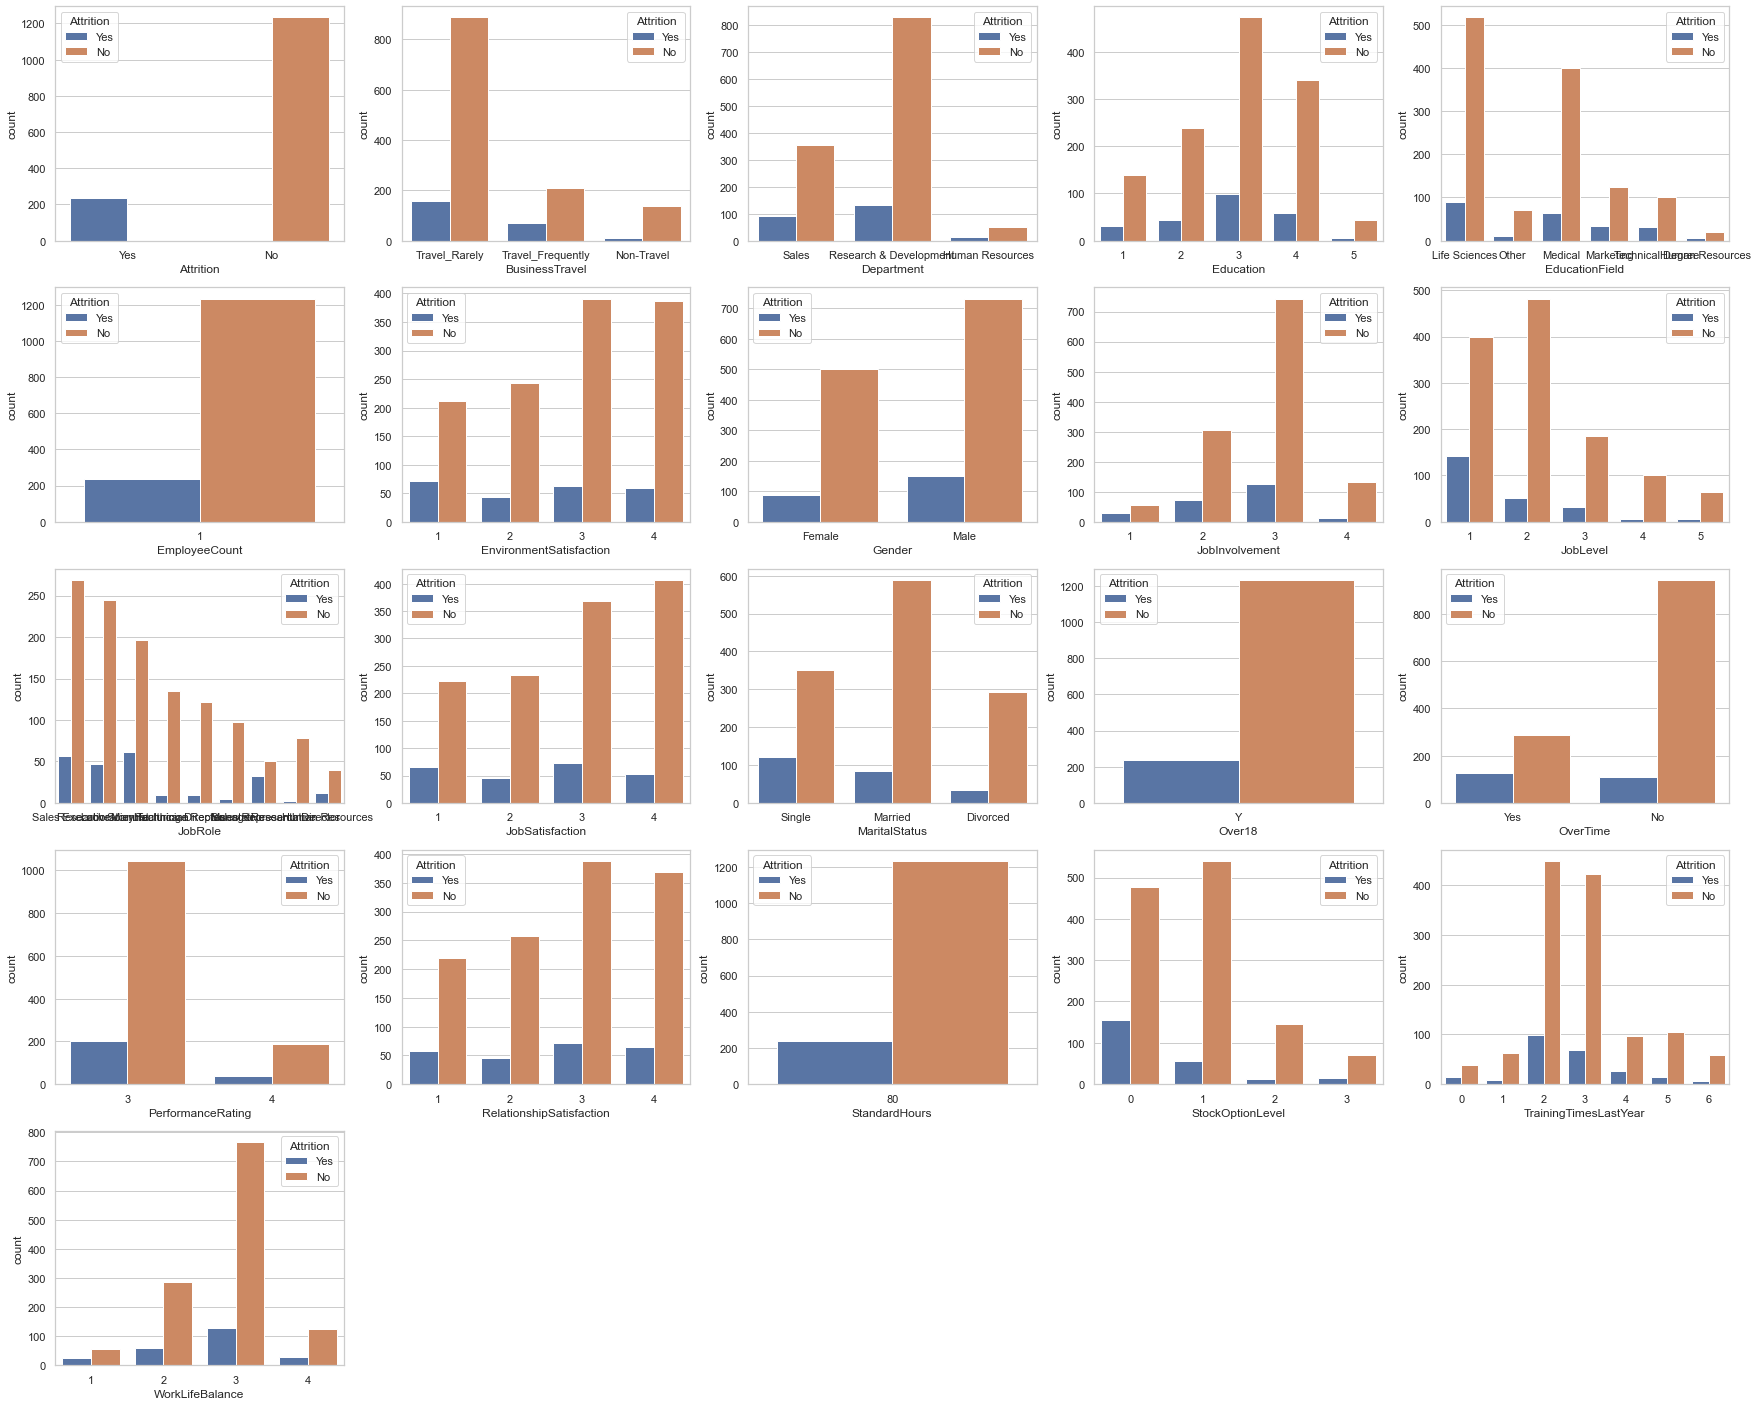

In [16]:
plt.figure(figsize=(30,25))
for i,col in enumerate(data_categorical.columns,1):
    plt.subplot(5,5,i)
    sns.countplot(data_categorical[col],hue=data_categorical['Attrition'])


# Getting into Numerical Data

In [17]:
data_numerical=[]

In [18]:
for col in data.columns:
    if data[col].dtype!="object" and data[col].nunique()>10:
        data_numerical.append(col)

In [19]:
data_numerical=data[data_numerical]

In [20]:
data_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0


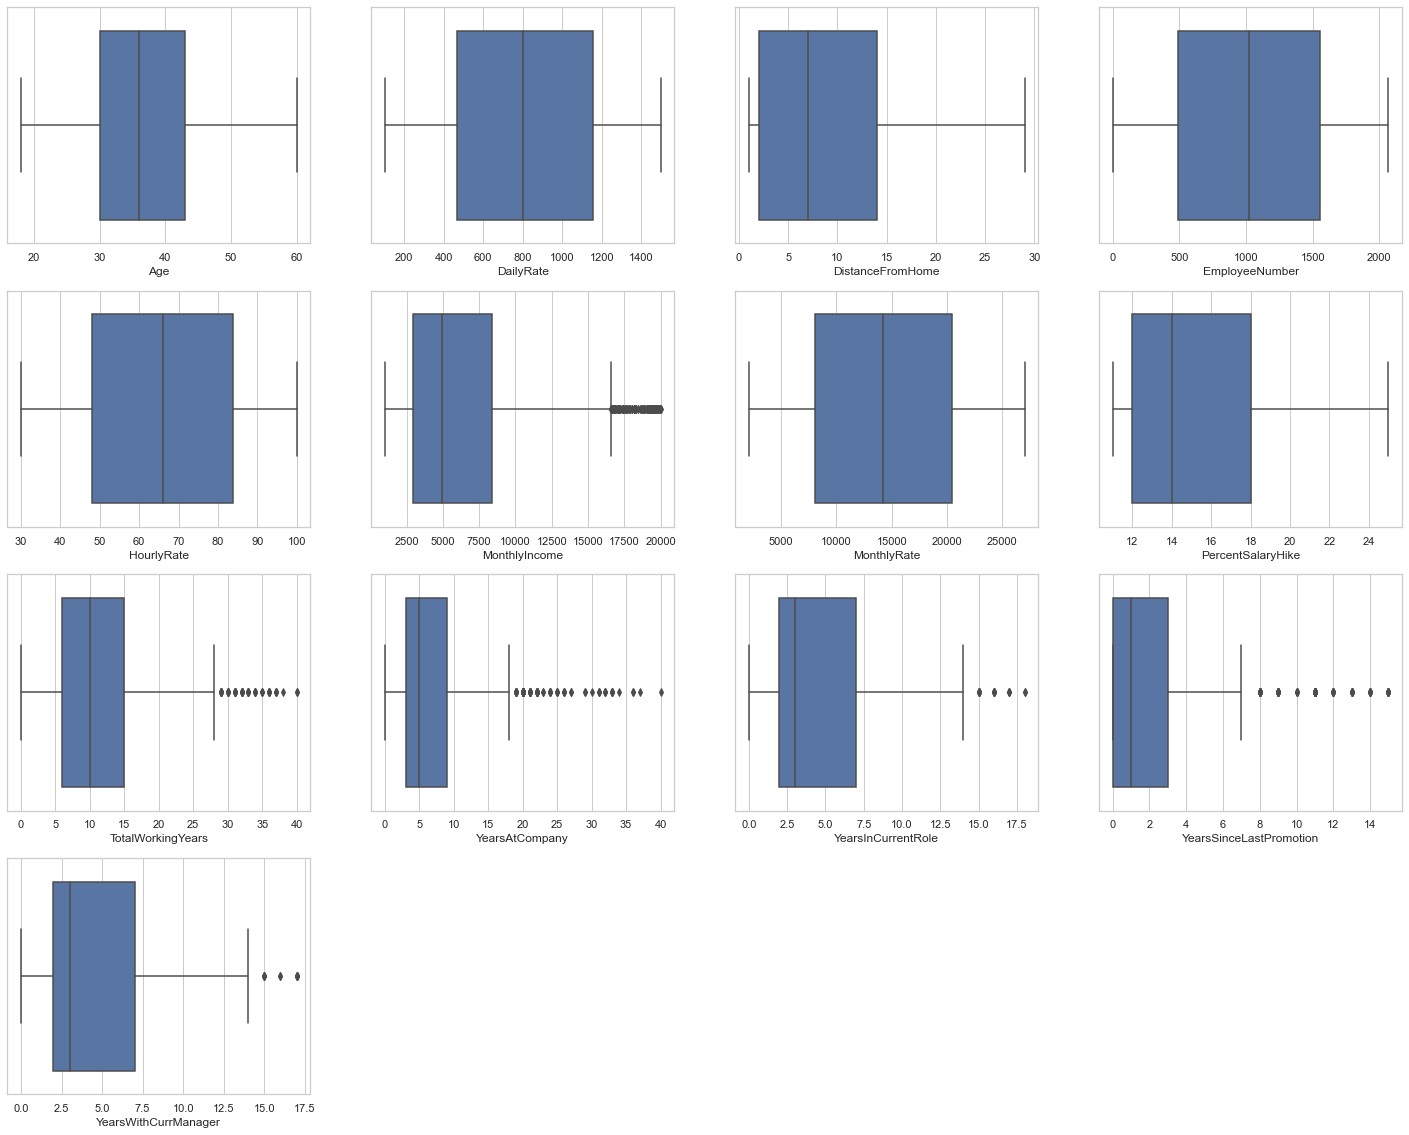

In [21]:
plt.figure(figsize=(25,20))
for i,col in enumerate(data_numerical.columns,1):
    plt.subplot(4,4,i)
    sns.boxplot(data_numerical[col])

# Target vs Numerical Data

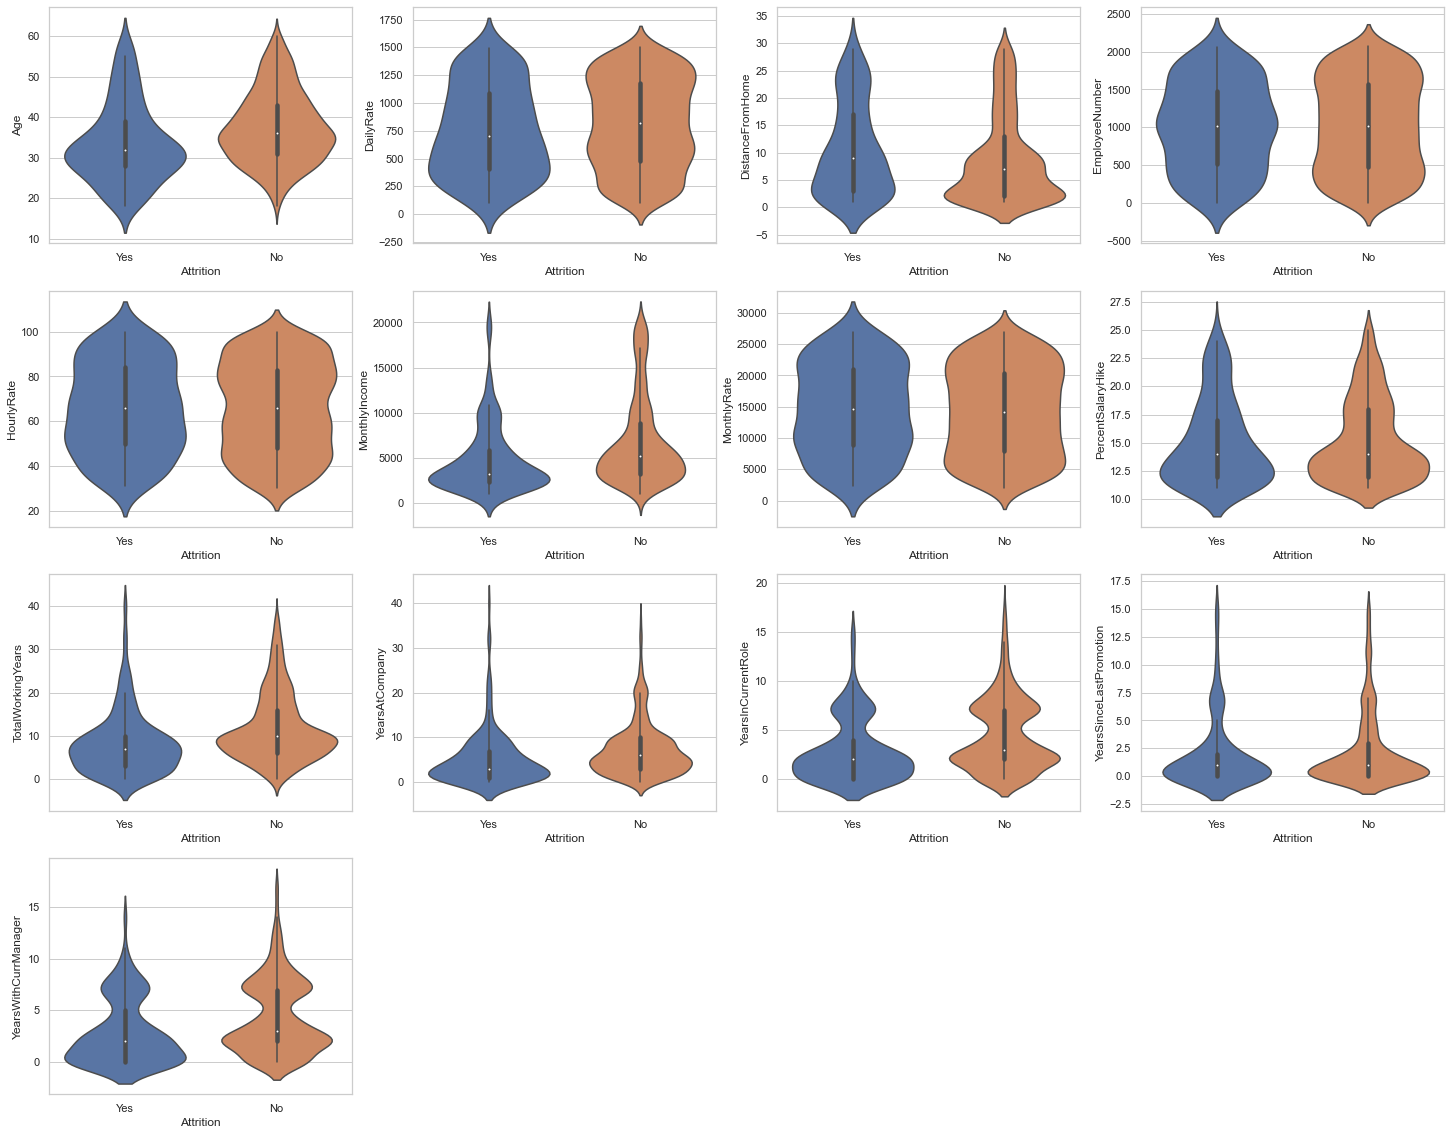

In [22]:
plt.figure(figsize=(25,20))
for i,col in enumerate(data_numerical.columns,1):
    plt.subplot(4,4,i)
    sns.violinplot(data['Attrition'],data_numerical[col])

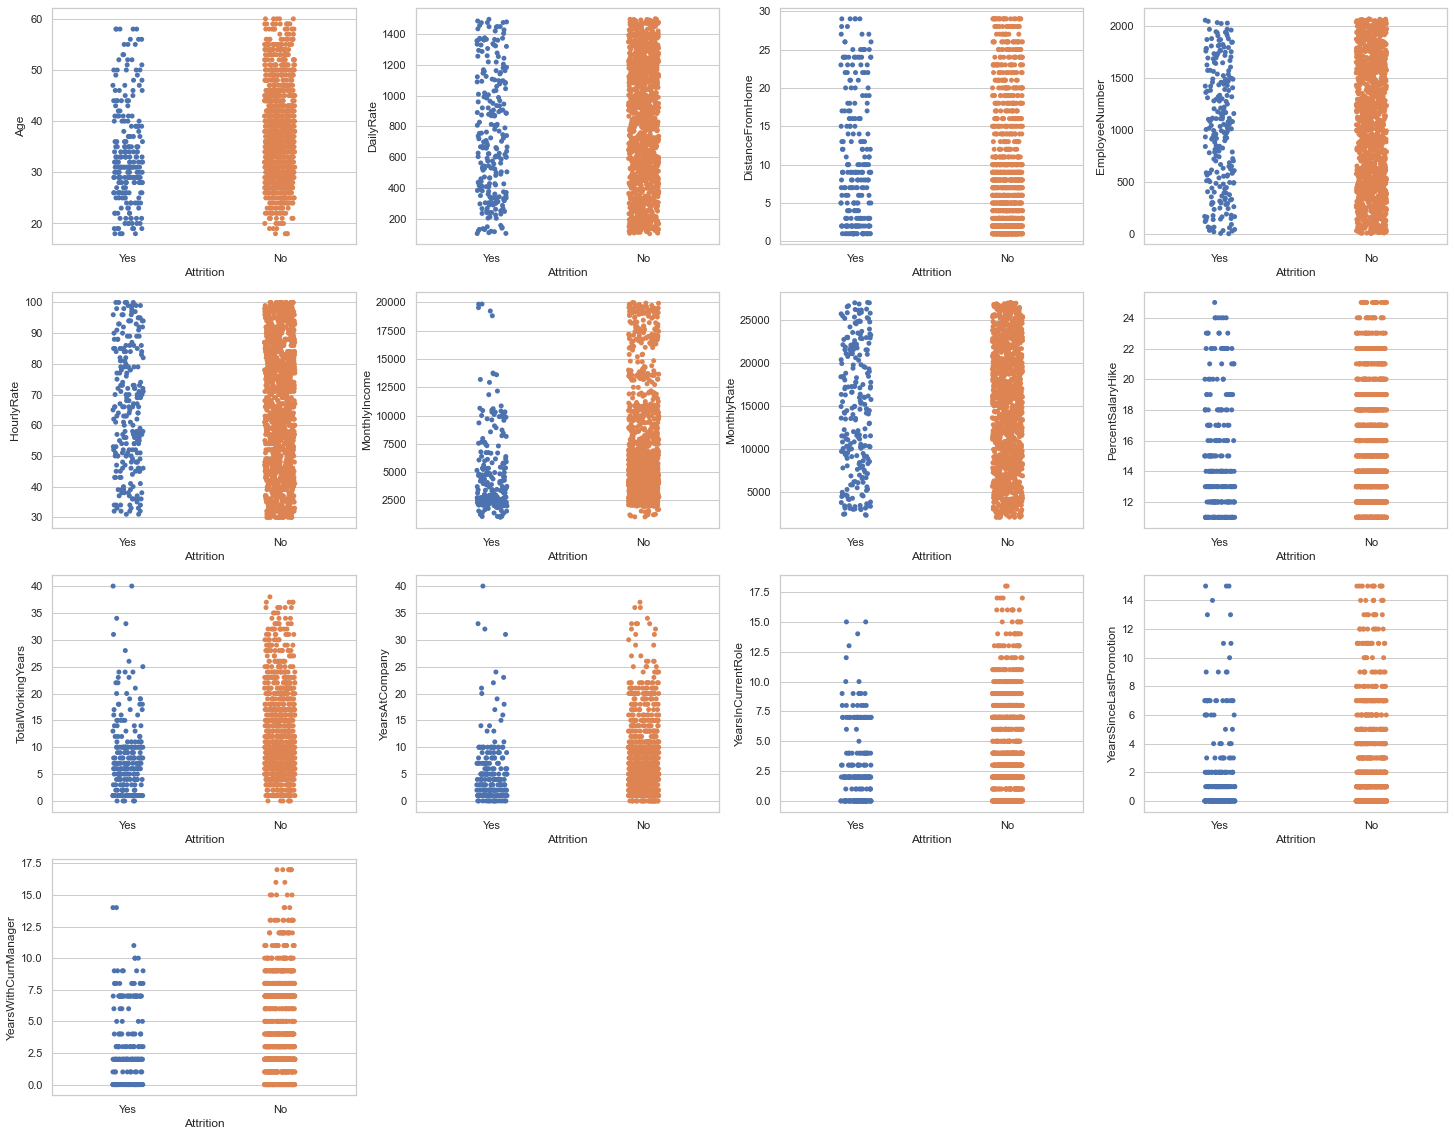

In [23]:
plt.figure(figsize=(25,20))
for i,col in enumerate(data_numerical.columns,1):
    plt.subplot(4,4,i)
    sns.stripplot(data['Attrition'],data_numerical[col])

# Data Preprocessing:Categorical Data PP

In [24]:
data_categorical

,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,Y,Yes,3,1,80,0,0,1
1,No,Travel_Frequently,Research & Development,1,Life Sciences,1,3,Male,2,2,Research Scientist,2,Married,Y,No,4,4,80,1,3,3
2,Yes,Travel_Rarely,Research & Development,2,Other,1,4,Male,2,1,Laboratory Technician,3,Single,Y,Yes,3,2,80,0,3,3
3,No,Travel_Frequently,Research & Development,4,Life Sciences,1,4,Female,3,1,Research Scientist,3,Married,Y,Yes,3,3,80,0,3,3
4,No,Travel_Rarely,Research & Development,1,Medical,1,1,Male,3,1,Laboratory Technician,2,Married,Y,No,3,4,80,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,2,Medical,1,3,Male,4,2,Laboratory Technician,4,Married,Y,No,3,3,80,1,3,3
1466,No,Travel_Rarely,Research & Development,1,Medical,1,4,Male,2,3,Healthcare Representative,1,Married,Y,No,3,1,80,1,5,3
1467,No,Travel_Rarely,Research & Development,3,Life Sciences,1,2,Male,4,2,Manufacturing Director,2,Married,Y,Yes,4,2,80,1,0,3
1468,No,Travel_Frequently,Sales,3,Medical,1,4,Male,2,2,Sales Executive,2,Married,Y,No,3,4,80,0,3,2


In [25]:
for col in data_categorical:
    print(col,":",data_categorical[col].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
Education : [2 1 4 3 5]
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EmployeeCount : [1]
EnvironmentSatisfaction : [2 3 4 1]
Gender : ['Female' 'Male']
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction : [4 2 3 1]
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StandardHours : [80]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]


In [26]:
categorical_nominal=[]

In [27]:
for col in data_categorical:
    if data[col].dtype=="object":
        categorical_nominal.append(col)

In [28]:
categorical_nominal=data[categorical_nominal]

In [29]:
categorical_nominal#Nominal Data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [30]:
categorical_nominal.drop('Over18',axis=1,inplace=True)

In [31]:
categorical_nominal_pp=pd.get_dummies(categorical_nominal,drop_first=True)

In [32]:
categorical_nominal_pp

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [33]:
data_categorical.drop(['Over18','EmployeeCount','StandardHours'],axis=1,inplace=True)

In [34]:
ordinal=[]
for col in data_categorical.columns:
    if data_categorical[col].dtype!="object":
        ordinal.append(col)

In [35]:
ordinal

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [36]:
ordinal=data_categorical[ordinal]

In [37]:
data_categorical_pp=pd.concat([ordinal,categorical_nominal_pp],axis=1)

In [38]:
data_categorical_pp

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,2,2,3,2,4,3,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1,3,2,2,2,4,4,1,3,3,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,2,4,2,1,3,3,2,0,3,3,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,4,4,3,1,3,3,3,0,3,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,1,1,3,1,2,3,4,1,3,3,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,3,4,2,4,3,3,1,3,3,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,1,4,2,3,1,3,1,1,5,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,3,2,4,2,2,4,2,1,0,3,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,3,4,2,2,2,3,4,0,3,2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


# Numerical Data PP

In [39]:
data_numerical

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,5993,19479,11,8,6,4,0,5
1,49,279,8,2,61,5130,24907,23,10,10,7,1,7
2,37,1373,2,4,92,2090,2396,15,7,0,0,0,0
3,33,1392,3,5,56,2909,23159,11,8,8,7,3,0
4,27,591,2,7,40,3468,16632,12,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,41,2571,12290,17,17,5,2,0,3
1466,39,613,6,2062,42,9991,21457,15,9,7,7,1,7
1467,27,155,4,2064,87,6142,5174,20,6,6,2,0,3
1468,49,1023,2,2065,63,5390,13243,14,17,9,6,0,8


In [40]:
data_numerical.drop('EmployeeNumber',axis=1,inplace=True)#remove unnecessary columns

In [41]:
#Let's check % outliers in each column
for col in data_numerical:
    q1=data_numerical[col].describe()['25%']
    q3=data_numerical[col].describe()['75%']
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    outlier_data=data_numerical[(data_numerical[col]<lb) | (data_numerical[col]>ub)]
    count=data_numerical[(data_numerical[col]<lb) | (data_numerical[col]>ub)].shape[0]
    p=count/1470*100
    if (p!=0) & (p<7):
        print("*****************************"+col+"**************************")
        print(lb,ub)
        print(p,"% outliers in",col)
        display(outlier_data[col])

*****************************TotalWorkingYears**************************
-7.5 28.5
4.285714285714286 % outliers in TotalWorkingYears


18      31
62      29
85      37
98      38
105     30
        ..
1264    34
1301    37
1331    29
1374    29
1401    35
Name: TotalWorkingYears, Length: 63, dtype: int64

*****************************YearsInCurrentRole**************************
-5.5 14.5
1.4285714285714286 % outliers in YearsInCurrentRole


45      15
63      16
123     18
187     15
190     18
231     17
281     16
417     15
466     16
595     15
716     16
746     16
861     15
976     16
1024    17
1150    15
1156    15
1221    15
1327    17
1351    17
1430    16
Name: YearsInCurrentRole, dtype: int64

*****************************YearsWithCurrManager**************************
-5.5 14.5
0.9523809523809524 % outliers in YearsWithCurrManager


28      17
123     15
153     15
187     15
231     15
386     17
561     16
616     17
635     15
686     17
875     17
926     17
1078    17
1348    16
Name: YearsWithCurrManager, dtype: int64

In [42]:
q1=data_numerical['TotalWorkingYears'].describe()['25%']
q3=data_numerical['TotalWorkingYears'].describe()['75%']
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [43]:
ub

28.5

In [44]:
lb_dict={}.fromkeys(data_numerical[(data_numerical['TotalWorkingYears']<lb)]['TotalWorkingYears'],lb)

In [45]:
lb_dict

{}

In [46]:
ub_dict={}.fromkeys(data_numerical[(data_numerical['TotalWorkingYears']>ub)]['TotalWorkingYears'],ub)

In [47]:
ub_dict

{31: 28.5,
 29: 28.5,
 37: 28.5,
 38: 28.5,
 30: 28.5,
 40: 28.5,
 36: 28.5,
 34: 28.5,
 32: 28.5,
 33: 28.5,
 35: 28.5}

In [48]:
#Replacing Outliers
for col in data_numerical:
    q1=data_numerical[col].describe()['25%']
    q3=data_numerical[col].describe()['75%']
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    outlier_data=data_numerical[(data_numerical[col]<lb) | (data_numerical[col]>ub)]
    count=data_numerical[(data_numerical[col]<lb) | (data_numerical[col]>ub)].shape[0]
    p=count/1470*100
    if (p!=0) & (p<7):
        lb_dict={}.fromkeys(data_numerical[(data_numerical[col]<lb)][col],lb)
        ub_dict={}.fromkeys(data_numerical[(data_numerical[col]>ub)][col],ub)
        lb_dict.update(ub_dict)
        data_numerical[col]=data_numerical[col].replace(lb_dict)

In [49]:
#No outliers now >7% of total in any column
for col in data_numerical:
    q1=data_numerical[col].describe()['25%']
    q3=data_numerical[col].describe()['75%']
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    outlier_data=data_numerical[(data_numerical[col]<lb) | (data_numerical[col]>ub)]
    count=data_numerical[(data_numerical[col]<lb) | (data_numerical[col]>ub)].shape[0]
    p=count/1470*100
    if (p!=0):
        print("*****************************"+col+"**************************")
        print(lb,ub)
        print(p,"% outliers in",col)
        display(outlier_data[col])

*****************************MonthlyIncome**************************
-5291.0 16581.0
7.755102040816326 % outliers in MonthlyIncome


25      19094
29      18947
45      19545
62      18740
105     18844
        ...  
1374    17875
1377    19161
1401    19636
1437    19431
1443    18880
Name: MonthlyIncome, Length: 114, dtype: int64

*****************************YearsAtCompany**************************
-6.0 18.0
7.07482993197279 % outliers in YearsAtCompany


18      25
28      22
45      22
62      27
63      21
        ..
1403    20
1404    20
1443    22
1445    20
1462    20
Name: YearsAtCompany, Length: 104, dtype: int64

*****************************YearsSinceLastPromotion**************************
-4.5 7.5
7.278911564625851 % outliers in YearsSinceLastPromotion


15       8
45      15
46       8
55       8
61       9
        ..
1414    12
1425     8
1444     9
1447    11
1462     9
Name: YearsSinceLastPromotion, Length: 107, dtype: int64

In [50]:
data_numerical.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,11,8.0,6,4.0,0,5.0
1,49,279,8,61,5130,24907,23,10.0,10,7.0,1,7.0
2,37,1373,2,92,2090,2396,15,7.0,0,0.0,0,0.0
3,33,1392,3,56,2909,23159,11,8.0,8,7.0,3,0.0
4,27,591,2,40,3468,16632,12,6.0,2,2.0,2,2.0


In [51]:
data_pp=pd.concat([data_categorical_pp,data_numerical],axis=1)#Get hands on entire preprocessed data

In [52]:
pd.set_option("display.max_columns",45)
data_pp.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,2,3,2,4,3,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,94,5993,19479,11,8.0,6,4.0,0,5.0
1,1,3,2,2,2,4,4,1,3,3,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,61,5130,24907,23,10.0,10,7.0,1,7.0
2,2,4,2,1,3,3,2,0,3,3,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,92,2090,2396,15,7.0,0,0.0,0,0.0
3,4,4,3,1,3,3,3,0,3,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,56,2909,23159,11,8.0,8,7.0,3,0.0
4,1,1,3,1,2,3,4,1,3,3,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,40,3468,16632,12,6.0,2,2.0,2,2.0


In [53]:
x=data_pp.drop('Attrition_Yes',axis=1)

In [54]:
y=data_pp['Attrition_Yes']

In [55]:
x_metadata=x.columns
x=x.values
y=y.values

# Split to Train-Test

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Handle Imbalanced Data

In [57]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(k_neighbors=5)
x_smo,y_smo=sm.fit_resample(x_train,y_train)
y_smo.shape

(1956,)

# Feature Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
sc=MinMaxScaler()

In [60]:
x_train=sc.fit_transform(x_train)

In [61]:
x_test=sc.transform(x_test)

In [62]:
x_test

array([[0.5       , 1.        , 0.66666667, ..., 0.27586207, 0.06666667,
        0.20689655],
       [0.25      , 1.        , 1.        , ..., 0.13793103, 0.06666667,
        0.20689655],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 1.        , 0.66666667, ..., 0.13793103, 0.06666667,
        0.13793103],
       [0.25      , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.66666667, 0.66666667, ..., 0.4137931 , 0.46666667,
        0.48275862]])

# Build Model

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

# Logistic Regression

In [64]:
lor=LogisticRegression()

In [65]:
lor.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred_lor=lor.predict(x_test)
y_pred_train_lor=lor.predict(x_train)

In [67]:
accuracy_score(y_train,y_pred_train_lor),accuracy_score(y_test,y_pred_lor)

(0.8818027210884354, 0.891156462585034)

In [68]:
print(classification_report(y_test,y_pred_lor))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.65      0.38      0.48        39

    accuracy                           0.89       294
   macro avg       0.78      0.68      0.71       294
weighted avg       0.88      0.89      0.88       294



In [69]:
coef=np.squeeze(abs(lor.coef_)).tolist()

In [70]:
tmp=pd.DataFrame({'Feature':x_metadata,'Feature Importance':coef})
tmp=tmp.sort_values(by='Feature Importance',ascending=False).head(20)

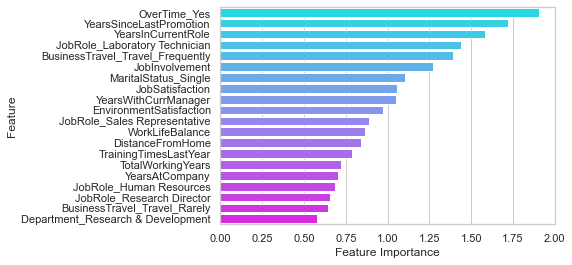

In [71]:
sns.barplot(tmp['Feature Importance'],tmp.Feature,orient='h',palette="cool")

# Decision Tree

In [72]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='sqrt',min_samples_leaf=4,min_samples_split=50)

In [73]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=50)

In [74]:
y_pred_dt=dt.predict(x_test)
y_pred_train_dt=dt.predict(x_train)

In [75]:
accuracy_score(y_train,y_pred_train_dt),accuracy_score(y_test,y_pred_dt)

(0.8486394557823129, 0.8469387755102041)

In [76]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.20      0.05      0.08        39

    accuracy                           0.85       294
   macro avg       0.53      0.51      0.50       294
weighted avg       0.78      0.85      0.81       294



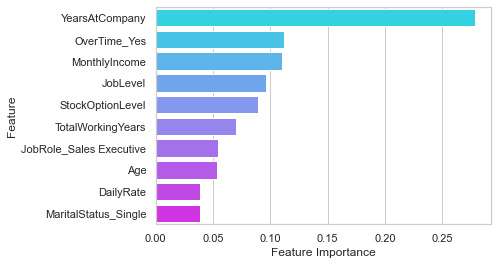

In [77]:
tmp=pd.DataFrame({'Feature':x_metadata,'Feature Importance':dt.feature_importances_})
tmp=tmp.sort_values(by='Feature Importance',ascending=False).head(10)
sns.barplot(tmp['Feature Importance'],tmp.Feature,orient='h',palette="cool")
plt.show()

*Class 1 has low precision,recall & f1 score- Data Imbalance*

# Random Forest

In [78]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5,bootstrap=True,random_state=0)

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=0)

In [80]:
y_pred_rf=rf.predict(x_test)
y_pred_train_rf=rf.predict(x_train)

In [81]:
accuracy_score(y_train,y_pred_train_rf),accuracy_score(y_test,y_pred_rf)

(0.8690476190476191, 0.8673469387755102)

# Logistic Regression is performing best with 0.89 accuracy

# Summary


Based on feature importances grabbed and analysis of influential factors:
1. Overtime seems to be primary factor behind attrition. Reduce overtime work, as they do care!
2. Increase employee engagement especially the youths
3. Enhance recognition & reward programs
4. Create pleasant work enviroment to improve JobSatisfaction